# Exercises: Data Science Libraries - DATAFRAMES

<a href = "https://ds.codeup.com/python/dataframes/#exercises">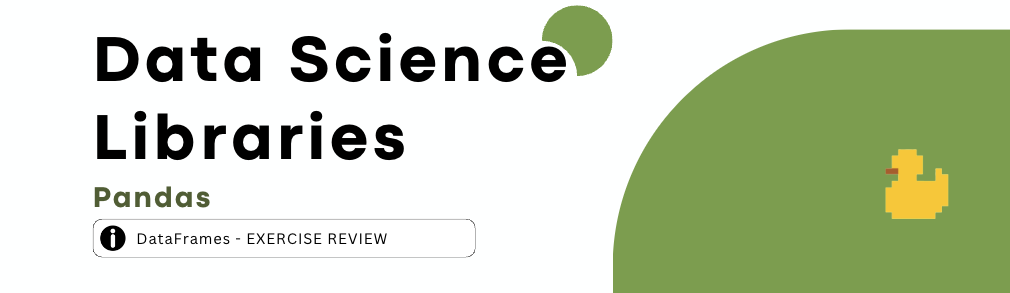</a>

<hr style="border:2px solid gray">

# 1. Copy the code from the lesson to create a dataframe full of student grades.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

type(df)

pandas.core.frame.DataFrame

In [2]:
df.head()

,name,math,english,reading
0,Sally,62,85,80
1,Jane,88,79,67
2,Suzie,94,74,95
3,Billy,98,96,88
4,Ada,77,92,98


## 1A. Create a column named `passing_english` that indicates whether each student has a passing grade in English.

In [3]:
df['english'] >= 70

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9      True
10     True
11    False
Name: english, dtype: bool

In [4]:
df['passing_english'] = df['english'] >= 70

In [5]:
df.head(10)

,name,math,english,reading,passing_english
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
9,Richard,69,80,94,True


## 1B. Sort the English grades by the `passing_english` column. How are duplicates handled?

In [6]:
df.sort_values(by='passing_english')

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True


## 1C. Sort the English grades first by `passing_english` and then by student name. All the students that are failing English should be first, and within the students that are failing English they should be ordered alphabetically. The same should be true for the students passing English. *(Hint: you can pass a list to the `.sort_values` method)*

In [7]:
df.sort_values(by=['passing_english', 'name'])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


## 1D. Sort the English grades first by `passing_english`, and then by the actual English grade, similar to how we did in the last step.

In [8]:
df.sort_values(by=['passing_english', 'english'], ascending = [True, False])

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
10,Isaac,92,99,93,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
0,Sally,62,85,80,True
9,Richard,69,80,94,True
1,Jane,88,79,67,True


## 1E. Calculate each students overall grade and add it as a column on the DataFrame. The overall grade is the average of the Math, English, and Reading grades.

In [9]:
df['overall'] = round((df.math + df.english + df.reading)/3, 0).astype(int)

In [10]:
df.head()

,name,math,english,reading,passing_english,overall
0,Sally,62,85,80,True,76
1,Jane,88,79,67,True,78
2,Suzie,94,74,95,True,88
3,Billy,98,96,88,True,94
4,Ada,77,92,98,True,89


# 2. Load the `mpg` dataset. Read the documentation for the dataset and use it for the following questions:

In [11]:
from pydataset import data

mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
#data('mpg', show_doc = True)

## 2A. How many rows and columns are there?

In [13]:
mpg.shape

(234, 11)

## 2B. What are the data types of each column?

In [14]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

## 2C. Summarize the DataFrame with `.info` and `.describe`

In [15]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [16]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


## 2D. Rename the `cty` column to `city`.

In [17]:
mpg = mpg.rename(columns={'cty': 'city'})

In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 2E. Rename the `hwy` column to `highway`.

In [19]:
mpg = mpg.rename(columns={'hwy': 'highway'})

In [20]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 2F. Do any cars have better city mileage than highway mileage?

In [21]:
#True = 1, False = 0
mask = mpg.city > mpg.highway

In [22]:
mask

1      False
2      False
3      False
4      False
5      False
       ...  
230    False
231    False
232    False
233    False
234    False
Length: 234, dtype: bool

In [23]:
len(mpg[mask])

0

In [24]:
mask.sum()

0

## 2G. Create a column named `mileage_difference` this column should contain the difference between highway and city mileage for each car.

In [25]:
mpg['mileage_difference'] = round(mpg.highway - mpg.city, 2)

In [26]:
mpg[['highway', 'city', 'mileage_difference']].head()

,highway,city,mileage_difference
1,29,18,11
2,29,21,8
3,31,20,11
4,30,21,9
5,26,16,10


## 2H. Which car (or cars) has the highest mileage difference?

In [27]:
mpg.describe()

,displ,year,cyl,city,highway,mileage_difference
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,6.581197
std,1.291959,4.509646,1.611534,4.255946,5.954643,2.262739
min,1.600000,1999.000000,4.000000,9.000000,12.000000,2.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,5.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,7.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,8.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,12.000000


In [61]:
mpg.mileage_difference.max()

12

In [29]:
mpg[mpg.mileage_difference == mpg.mileage_difference.max()]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12


## 2I. Which compact class car has the worst highway mileage? The best?

In [30]:
mpg[mpg['class'] == 'compact']

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,8
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,9
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,8
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,9
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,8


In [31]:
#This is a little busy, lets clean it up in the next.
mpg[(mpg['class'] == 'compact') & 
    (mpg['highway'] == mpg[mpg['class'] == 'compact'].highway.max())]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


In [32]:
compacts = mpg[mpg['class'] == 'compact']

In [33]:
compacts[(compacts.highway == compacts.highway.max())]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


In [34]:
compacts[(compacts.highway == compacts.highway.min())]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,7


## 2J. Create a column named `average_mileage` that is the mean of the city and highway mileage.

In [35]:
mpg['avg_mileage'] = (mpg.city + mpg.highway) /2

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


## 2K. Which Dodge car has the best average mileage? The worst?

In [37]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'city',
       'highway', 'fl', 'class', 'mileage_difference', 'avg_mileage'],
      dtype='object')

In [38]:
dodges = mpg[mpg.manufacturer == 'dodge']

In [39]:
dodges.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,avg_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0
39,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan,7,20.5
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan,6,19.0
41,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan,6,19.0
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,7,20.5


In [40]:
dodges[dodges.avg_mileage == dodges.avg_mileage.max()]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,avg_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0


In [41]:
dodges[dodges.avg_mileage == dodges.avg_mileage.min()]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,avg_mileage
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5


# 3. Load the `Mammals` dataset. Read the documentation for it, and use the data to answer these questions:

In [42]:
mams = data('Mammals')

In [43]:
mams.head()

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False
2,4000.0,26.0,False,False
3,3000.0,25.0,False,False
4,1400.0,45.0,False,False
5,400.0,70.0,False,False


In [44]:
#data('Mammals', show_doc=True)

## 3A. How many rows and columns are there?

In [45]:
mams.shape

(107, 4)

## 3B. What are the data types?

In [46]:
mams.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

## 3C. Summarize the DataFrame with `.info` and `.describe`

In [47]:
mams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    107 non-null    float64
 1   speed     107 non-null    float64
 2   hoppers   107 non-null    bool   
 3   specials  107 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


In [48]:
mams.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


## 3D. What is the the weight of the fastest animal?

In [49]:
mams[mams.speed == mams.speed.max()].weight

53    55.0
Name: weight, dtype: float64

## 3E. What is the overall percentage of specials?

In [50]:
mams.specials.sum()

10

In [51]:
len(mams)

107

In [52]:
(mams.specials.sum() /len(mams))* 100

9.345794392523365

## 3F. How many animals are hoppers that are above the median speed? What percentage is this?

In [53]:
mams.columns

Index(['weight', 'speed', 'hoppers', 'specials'], dtype='object')

In [54]:
mams[mams.hoppers]

,weight,speed,hoppers,specials
82,0.056,21.0,True,False
85,0.035,32.0,True,False
86,0.035,14.0,True,False
96,4.600,64.0,True,False
97,4.400,72.0,True,False
98,4.000,72.0,True,False
99,3.500,56.0,True,False
100,2.000,64.0,True,False
101,1.900,56.0,True,False
102,1.500,50.0,True,False


In [55]:
mams[mams.speed > mams.speed.median()]

,weight,speed,hoppers,specials
5,400.0,70.0,False,False
6,350.0,70.0,False,False
7,300.0,64.0,False,False
8,260.0,70.0,False,False
11,1000.0,60.0,False,False
12,900.0,70.0,False,False
13,900.0,56.0,False,False
15,750.0,57.0,False,False
17,450.0,56.0,False,False
18,300.0,72.0,False,False


In [56]:
mams[(mams.hoppers == True) & (mams.speed > mams.speed.median())]

,weight,speed,hoppers,specials
96,4.6,64.0,True,False
97,4.4,72.0,True,False
98,4.0,72.0,True,False
99,3.5,56.0,True,False
100,2.0,64.0,True,False
101,1.9,56.0,True,False
102,1.5,50.0,True,False


In [57]:
round(len(mams[(mams.hoppers == True) & 
      (mams.speed > mams.speed.median())]) / len(mams) *100, 2)

6.54

In [58]:
hoppers = mams[(mams.hoppers == True)]

In [59]:
hoppers.head()

,weight,speed,hoppers,specials
82,0.056,21.0,True,False
85,0.035,32.0,True,False
86,0.035,14.0,True,False
96,4.600,64.0,True,False
97,4.400,72.0,True,False


In [60]:
#CAUTION: Reference the correct dataframe when comparing a 
#subset of a data frame(hoppers) to the whole dataframe(mams)
round(len(hoppers[(hoppers.speed > mams.speed.median())]) / len(mams) *100, 2)

6.54